# Code template
#The format of code is written in a way we call 'layer' function which takes 3 arguments , layer number, number of units & activation type. 
Then we need to call designNrun() function that will do all the required intitalisation and run the code. For displaying the result confusion matrix is used, which I feel best concise way to represent the result. Error in the prediction is calculated in fraction. 

# code for 2 layer and related outputs

In [42]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  7 17:16:46 2019

@author: vardhan
"""

import os
import numpy as np
import struct
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline  


path = 'C:/Users/HPP/Desktop/Python/DL clas/MNIST'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path

#Test data
fname_test_images = os.path.join(path, 't10k-images.idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels.idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
    
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_labels), rows, cols)
    
#print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image



##_--------------Data Preprocessing ----------------------------------##
#Goal of this section: segregating the data into small chunks, changing the label, seperate train & test data

num_samples=30000 #select the size of data for segregating

train_images_section= train_images[0:num_samples]
train_labels_section= train_labels[0:num_samples]

train_images_section=train_images_section/255    # data Normalization
#print('one instance of train image is :',train_images_section[0])

for i in range(0,num_samples): 
 if(train_labels_section[i]==3):
   train_labels_section[i]=1
 else:
   train_labels_section[i]=0

 
X_train=train_images_section
y_train= train_labels_section

print('The training set contains', len(X_train), 'images')  # print the how many images contained in the training set
print('The shape of the train image is', X_train[0].shape)  # print the shape of the image



##------------Preparing vectorized form of data--------------------##
a={}
b=[]
w={};
bias={};
activ=[]
m=X_train.shape[0]
print('m is:',m)
print(X_train.shape);
a[0]=X_train.reshape(X_train.shape[1]*X_train.shape[2],X_train.shape[0])
print('shape of x train_m:',a[0].shape)
y_train_v=y_train.reshape(y_train.shape[0],1).T
print('shape of y_train_v:',y_train_v.shape)

alpha= 0.0003

#-----------------------------9999999999999999999999999999-------------------------

modelstruct={}
def layer(layernumber,numberofUnits,Activation):
 global modelstruct
 layerdata={}
 layerdata["numU"]=numberofUnits
 layerdata["actF"]=Activation
 #print(layerdata)
 layer=('Layer'+str(layernumber))
 modelstruct[layer]=layerdata
 #print(modelstruct)


def createmodelparameter():
  global modelstruct
  l=[]
  print(modelstruct)
  print(len(modelstruct))
  for x in modelstruct:
   l.append(modelstruct[x]["numU"])
  l=np.array(l)
  return l

def designNrun():
 global a
 layer(0,784,'None')
 layer(1,5,'relu')
 layer(2,1,'sigmoid')
 cost=[]
 iteration=[]
 w_size_list=createmodelparameter()
 print('Weight size list:',w_size_list)
 global w;
 z={};
 dz={}
 dw={}
 db={}
 global b;
 global bias;
 global activ;
 for i in range(len(w_size_list)-1):
     w[i+1]= np.random.randn(w_size_list[i+1],w_size_list[i])
     print('Shape of weight[',i+1,']:',w[i+1].shape)  
     b.append(0)
     bias[i+1]=0
     bias[i+1]=np.array(bias[i+1])
     
 #print('Bias:',bias)
 print('Number of active layers:',len(b))

 for x in modelstruct:
     activ.append(modelstruct[x]["actF"])
  
 print('Activation type of layers:',activ)
 print('Size of a[0] is:',a[0].shape)
 
    
 for itr in range(1050): 
  
#Forward prop::
  for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])

#calculation of cost J :
     if(i+1==len(b)):    
      J=-y_train_v*(np.log(a[i+1]))-(1-y_train_v)*np.log(1-a[i+1]) 
      J= np.sum(J)/m
      cost.append(J)
      iteration.append(itr)
     
#Backward Prop::
  back= len(b)
  for j in range(len(b)):
   
    if(back-j==len(b)):       
       dz[back-j]=sigmoidD(a[back-j],y_train_v)
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
    else :
      if(activ[back-j]=='relu'): 
       dz[back-j]=np.dot(w[back-j+1].T,dz[back-j+1])* reluD(z[back-j])
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
 

#value updation ::
  for k in range(len(b)):
      w[k+1]=w[k+1]-alpha*dw[k+1]
      bias[k+1]=bias[k+1]-alpha*db[k+1]     
      
 pyplot.title("cost function")
 pyplot.xlabel("iteration")
 pyplot.ylabel("cost");
 pyplot.plot(iteration,cost, color='red',linewidth=2,label="J cost")
 pyplot.show()

def relu(z):
    return np.maximum(z,[0])
def reluD(z):
    return ((z>0)*1)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoidD(a,y):
    return (a-y)

The shape of the image is (28, 28)
The training set contains 30000 images
The shape of the train image is (28, 28)
m is: 30000
(30000, 28, 28)
shape of x train_m: (784, 30000)
shape of y_train_v: (1, 30000)


# The below function design the network and run the network & print the cost 

{'Layer0': {'numU': 784, 'actF': 'None'}, 'Layer1': {'numU': 5, 'actF': 'relu'}, 'Layer2': {'numU': 1, 'actF': 'sigmoid'}}
3
Weight size list: [784   5   1]
Shape of weight[ 1 ]: (5, 784)
Shape of weight[ 2 ]: (1, 5)
Number of active layers: 2
Activation type of layers: ['None', 'relu', 'sigmoid']
Size of a[0] is: (784, 30000)


C:\Users\HPP\Anaconda3new\lib\site-packages\ipykernel_launcher.py:164: RuntimeWarning: divide by zero encountered in log


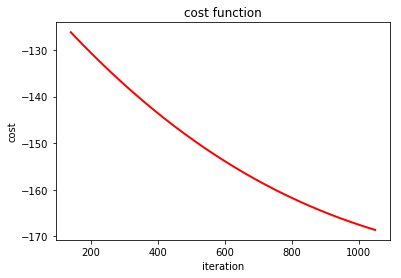

In [43]:
designNrun()

# Testing the model with test data  (number of samples selected is 2000)

In [44]:
num_samplesT=2000  #select the size of data for segregating

test_images_section= test_images[0:num_samplesT]
test_labels_section= test_labels[0:num_samplesT]

test_images_section=test_images_section/255    # data Normalization


#changing label of data 
for i in range(0,num_samplesT):
 if(test_labels_section[i]==3):
   test_labels_section[i]=1
 else:
   test_labels_section[i]=0
   

#Take a piece of data from given dataset  
X_test=test_images_section
y_test= test_labels_section

print('The testing set contains', len(X_test), 'images')  # print the how many images contained in the training set
print('The shape of the test image is', X_test[0].shape)  # print the shape of the image

print('The testing set contains', len(y_test), 'labels')  # print the how many images contained in the training set


X_test_m=X_test.reshape(X_test.shape[1]*X_test.shape[2],X_test.shape[0])
print('shape of x test_m:',X_test_m.shape)
y_test_v=y_test.reshape(y_test.shape[0],1).T
print('shape of y_test_v:',y_test_v.shape)
a[0]=X_test_m
z={}
for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])
m=len(b)
for i in range(a[m].shape[1]):
    if(a[m][0,i]<0.5):
        a[m][0,i]=0
    else:
        a[m][0,i]=1
        


c=a[m]-y_test_v
counter=0
for i in range(c.shape[1]):
    if c[0,i] !=0:
        counter=counter+1

print('/n fraction of error in testing:',counter/c.shape[1]) 


A=a[m].reshape(a[m].shape[1],)
cm = confusion_matrix(y_test, A)

The testing set contains 2000 images
The shape of the test image is (28, 28)
The testing set contains 2000 labels
shape of x test_m: (784, 2000)
shape of y_test_v: (1, 2000)
/n fraction of error in testing: 0.24


In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.tight_layout()


# confision matrix is displaying the result of test data prediction 

Confusion matrix, without normalization
[[1483  310]
 [ 170   37]]


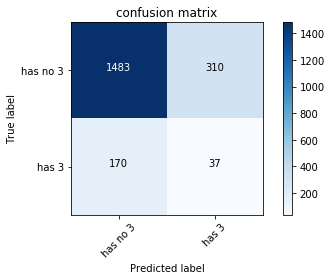

In [46]:
cm_plot_labels=['has no 3','has 3']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')

# Model with 3 layers with all other variables are same

In [64]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  7 17:16:46 2019

@author: vardhan
"""

import os
import numpy as np
import struct
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline  


path = 'C:/Users/HPP/Desktop/Python/DL clas/MNIST'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path

#Test data
fname_test_images = os.path.join(path, 't10k-images.idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels.idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
    
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_labels), rows, cols)
    
#print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image



##_--------------Data Preprocessing ----------------------------------##
#Goal of this section: segregating the data into small chunks, changing the label, seperate train & test data

num_samples=30000 #select the size of data for segregating

train_images_section= train_images[0:num_samples]
train_labels_section= train_labels[0:num_samples]

train_images_section=train_images_section/255    # data Normalization
#print('one instance of train image is :',train_images_section[0])

for i in range(0,num_samples): 
 if(train_labels_section[i]==3):
   train_labels_section[i]=1
 else:
   train_labels_section[i]=0

 
X_train=train_images_section
y_train= train_labels_section

print('The training set contains', len(X_train), 'images')  # print the how many images contained in the training set
print('The shape of the train image is', X_train[0].shape)  # print the shape of the image



##------------Preparing vectorized form of data--------------------##
a={}
b=[]
w={};
bias={};
activ=[]
m=X_train.shape[0]
print('m is:',m)
print(X_train.shape);
a[0]=X_train.reshape(X_train.shape[1]*X_train.shape[2],X_train.shape[0])
print('shape of x train_m:',a[0].shape)
y_train_v=y_train.reshape(y_train.shape[0],1).T
print('shape of y_train_v:',y_train_v.shape)

alpha= 0.0001

#-----------------------------9999999999999999999999999999-------------------------

modelstruct={}
def layer(layernumber,numberofUnits,Activation):
 global modelstruct
 layerdata={}
 layerdata["numU"]=numberofUnits
 layerdata["actF"]=Activation
 #print(layerdata)
 layer=('Layer'+str(layernumber))
 modelstruct[layer]=layerdata
 #print(modelstruct)


def createmodelparameter():
  global modelstruct
  l=[]
  print(modelstruct)
  print(len(modelstruct))
  for x in modelstruct:
   l.append(modelstruct[x]["numU"])
  l=np.array(l)
  return l

def designNrun():
 global a
 layer(0,784,'None')
 layer(1,5,'relu')
 layer(2,5,'relu')
 layer(3,1,'sigmoid')
 cost=[]
 iteration=[]
 w_size_list=createmodelparameter()
 print('Weight size list:',w_size_list)
 global w;
 z={};
 dz={}
 dw={}
 db={}
 global b;
 global bias;
 global activ;
 for i in range(len(w_size_list)-1):
     w[i+1]= np.random.randn(w_size_list[i+1],w_size_list[i])
     print('Shape of weight[',i+1,']:',w[i+1].shape)  
     b.append(0)
     bias[i+1]=0
     bias[i+1]=np.array(bias[i+1])
     
 #print('Bias:',bias)
 print('Number of active layers:',len(b))

 for x in modelstruct:
     activ.append(modelstruct[x]["actF"])
  
 print('Activation type of layers:',activ)
 print('Size of a[0] is:',a[0].shape)
 
    
 for itr in range(1050): 
  
#Forward prop::
  for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])

#calculation of cost J :
     if(i+1==len(b)):    
      J=-y_train_v*(np.log(a[i+1]))-(1-y_train_v)*np.log(1-a[i+1]) 
      J= np.sum(J)/m
      cost.append(J)
      iteration.append(itr)
     
#Backward Prop::
  back= len(b)
  for j in range(len(b)):
   
    if(back-j==len(b)):       
       dz[back-j]=sigmoidD(a[back-j],y_train_v)
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
    else :
      if(activ[back-j]=='relu'): 
       dz[back-j]=np.dot(w[back-j+1].T,dz[back-j+1])* reluD(z[back-j])
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
 

#value updation ::
  for k in range(len(b)):
      w[k+1]=w[k+1]-alpha*dw[k+1]
      bias[k+1]=bias[k+1]-alpha*db[k+1]     
      
 pyplot.title("cost function")
 pyplot.xlabel("iteration")
 pyplot.ylabel("cost");
 pyplot.plot(iteration,cost, color='red',linewidth=2,label="J cost")
 pyplot.show()

def relu(z):
    return np.maximum(z,[0])
def reluD(z):
    return ((z>0)*1)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoidD(a,y):
    return (a-y)

The shape of the image is (28, 28)
The training set contains 30000 images
The shape of the train image is (28, 28)
m is: 30000
(30000, 28, 28)
shape of x train_m: (784, 30000)
shape of y_train_v: (1, 30000)


{'Layer0': {'numU': 784, 'actF': 'None'}, 'Layer1': {'numU': 5, 'actF': 'relu'}, 'Layer2': {'numU': 5, 'actF': 'relu'}, 'Layer3': {'numU': 1, 'actF': 'sigmoid'}}
4
Weight size list: [784   5   5   1]
Shape of weight[ 1 ]: (5, 784)
Shape of weight[ 2 ]: (5, 5)
Shape of weight[ 3 ]: (1, 5)
Number of active layers: 3
Activation type of layers: ['None', 'relu', 'relu', 'sigmoid']
Size of a[0] is: (784, 30000)


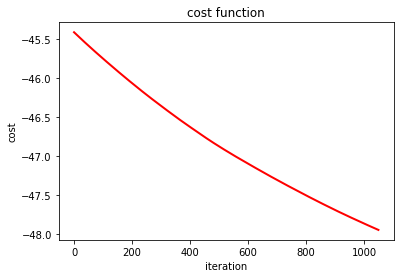

In [65]:
designNrun()

In [66]:
num_samplesT=2000  #select the size of data for segregating

test_images_section= test_images[0:num_samplesT]
test_labels_section= test_labels[0:num_samplesT]

test_images_section=test_images_section/255    # data Normalization


#changing label of data 
for i in range(0,num_samplesT):
 if(test_labels_section[i]==3):
   test_labels_section[i]=1
 else:
   test_labels_section[i]=0
   

#Take a piece of data from given dataset  
X_test=test_images_section
y_test= test_labels_section

print('The testing set contains', len(X_test), 'images')  # print the how many images contained in the training set
print('The shape of the test image is', X_test[0].shape)  # print the shape of the image

print('The testing set contains', len(y_test), 'labels')  # print the how many images contained in the training set


X_test_m=X_test.reshape(X_test.shape[1]*X_test.shape[2],X_test.shape[0])
print('shape of x test_m:',X_test_m.shape)
y_test_v=y_test.reshape(y_test.shape[0],1).T
print('shape of y_test_v:',y_test_v.shape)
a[0]=X_test_m
z={}
for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])
m=len(b)
for i in range(a[m].shape[1]):
    if(a[m][0,i]<0.5):
        a[m][0,i]=0
    else:
        a[m][0,i]=1
        


c=a[m]-y_test_v
counter=0
for i in range(c.shape[1]):
    if c[0,i] !=0:
        counter=counter+1

print('/n fraction of error in testing:',counter/c.shape[1]) 


A=a[m].reshape(a[m].shape[1],)
cm = confusion_matrix(y_test, A)

The testing set contains 2000 images
The shape of the test image is (28, 28)
The testing set contains 2000 labels
shape of x test_m: (784, 2000)
shape of y_test_v: (1, 2000)
/n fraction of error in testing: 0.3615


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.tight_layout()


Confusion matrix, without normalization
[[1210  583]
 [ 140   67]]


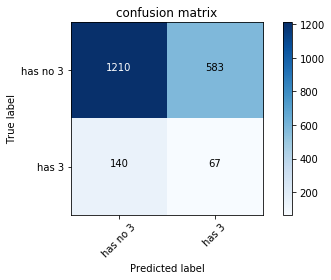

In [68]:
cm_plot_labels=['has no 3','has 3']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')

# Model with 4 layers with rest all variables are same

In [79]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  7 17:16:46 2019

@author: vardhah
"""

import os
import numpy as np
import struct
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline  


path = 'C:/Users/HPP/Desktop/Python/DL clas/MNIST'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path

#Test data
fname_test_images = os.path.join(path, 't10k-images.idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels.idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
    
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_labels), rows, cols)
    
#print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image



##_--------------Data Preprocessing ----------------------------------##
#Goal of this section: segregating the data into small chunks, changing the label, seperate train & test data

num_samples=30000 #select the size of data for segregating

train_images_section= train_images[0:num_samples]
train_labels_section= train_labels[0:num_samples]

train_images_section=train_images_section/255    # data Normalization
#print('one instance of train image is :',train_images_section[0])

for i in range(0,num_samples): 
 if(train_labels_section[i]==3):
   train_labels_section[i]=1
 else:
   train_labels_section[i]=0

 
X_train=train_images_section
y_train= train_labels_section

print('The training set contains', len(X_train), 'images')  # print the how many images contained in the training set
print('The shape of the train image is', X_train[0].shape)  # print the shape of the image



##------------Preparing vectorized form of data--------------------##
a={}
b=[]
w={};
bias={};
activ=[]
m=X_train.shape[0]
print('m is:',m)
print(X_train.shape);
a[0]=X_train.reshape(X_train.shape[1]*X_train.shape[2],X_train.shape[0])
print('shape of x train_m:',a[0].shape)
y_train_v=y_train.reshape(y_train.shape[0],1).T
print('shape of y_train_v:',y_train_v.shape)

alpha= 0.00001

#-----------------------------9999999999999999999999999999-------------------------

modelstruct={}
def layer(layernumber,numberofUnits,Activation):
 global modelstruct
 layerdata={}
 layerdata["numU"]=numberofUnits
 layerdata["actF"]=Activation
 #print(layerdata)
 layer=('Layer'+str(layernumber))
 modelstruct[layer]=layerdata
 #print(modelstruct)


def createmodelparameter():
  global modelstruct
  l=[]
  print(modelstruct)
  print(len(modelstruct))
  for x in modelstruct:
   l.append(modelstruct[x]["numU"])
  l=np.array(l)
  return l

def designNrun():
 global a
 layer(0,784,'None')
 layer(1,5,'relu')
 layer(2,5,'relu')
 layer(3,5,'relu')
 layer(4,1,'sigmoid')
 cost=[]
 iteration=[]
 w_size_list=createmodelparameter()
 print('Weight size list:',w_size_list)
 global w;
 z={};
 dz={}
 dw={}
 db={}
 global b;
 global bias;
 global activ;
 for i in range(len(w_size_list)-1):
     w[i+1]= np.random.randn(w_size_list[i+1],w_size_list[i])
     print('Shape of weight[',i+1,']:',w[i+1].shape)  
     b.append(0)
     bias[i+1]=0
     bias[i+1]=np.array(bias[i+1])
     
 #print('Bias:',bias)
 print('Number of active layers:',len(b))

 for x in modelstruct:
     activ.append(modelstruct[x]["actF"])
  
 print('Activation type of layers:',activ)
 print('Size of a[0] is:',a[0].shape)
 
    
 for itr in range(1050): 
  
#Forward prop::
  for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])

#calculation of cost J :
     if(i+1==len(b)):    
      J=-y_train_v*(np.log(a[i+1]))-(1-y_train_v)*np.log(1-a[i+1]) 
      J= np.sum(J)/m
      cost.append(J)
      iteration.append(itr)
     
#Backward Prop::
  back= len(b)
  for j in range(len(b)):
   
    if(back-j==len(b)):       
       dz[back-j]=sigmoidD(a[back-j],y_train_v)
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
    else :
      if(activ[back-j]=='relu'): 
       dz[back-j]=np.dot(w[back-j+1].T,dz[back-j+1])* reluD(z[back-j])
       dw[back-j]= (1/m)* np.dot(dz[back-j],a[back-j-1].T)
       db[back-j]=(1/m)*np.sum(dz[back-j],axis=1,keepdims=True)
       
 

#value updation ::
  for k in range(len(b)):
      w[k+1]=w[k+1]-alpha*dw[k+1]
      bias[k+1]=bias[k+1]-alpha*db[k+1]     
      
 pyplot.title("cost function")
 pyplot.xlabel("iteration")
 pyplot.ylabel("cost");
 pyplot.plot(iteration,cost, color='red',linewidth=2,label="J cost")
 pyplot.show()

def relu(z):
    return np.maximum(z,[0])
def reluD(z):
    return ((z>0)*1)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoidD(a,y):
    return (a-y)

The shape of the image is (28, 28)
The training set contains 30000 images
The shape of the train image is (28, 28)
m is: 30000
(30000, 28, 28)
shape of x train_m: (784, 30000)
shape of y_train_v: (1, 30000)


{'Layer0': {'numU': 784, 'actF': 'None'}, 'Layer1': {'numU': 5, 'actF': 'relu'}, 'Layer2': {'numU': 5, 'actF': 'relu'}, 'Layer3': {'numU': 5, 'actF': 'relu'}, 'Layer4': {'numU': 1, 'actF': 'sigmoid'}}
5
Weight size list: [784   5   5   5   1]
Shape of weight[ 1 ]: (5, 784)
Shape of weight[ 2 ]: (5, 5)
Shape of weight[ 3 ]: (5, 5)
Shape of weight[ 4 ]: (1, 5)
Number of active layers: 4
Activation type of layers: ['None', 'relu', 'relu', 'relu', 'sigmoid']
Size of a[0] is: (784, 30000)


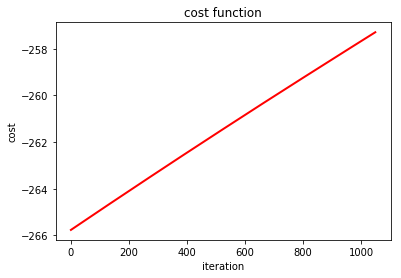

In [80]:
designNrun()

In [81]:
num_samplesT=2000  #select the size of data for segregating

test_images_section= test_images[0:num_samplesT]
test_labels_section= test_labels[0:num_samplesT]

test_images_section=test_images_section/255    # data Normalization


#changing label of data 
for i in range(0,num_samplesT):
 if(test_labels_section[i]==3):
   test_labels_section[i]=1
 else:
   test_labels_section[i]=0
   

#Take a piece of data from given dataset  
X_test=test_images_section
y_test= test_labels_section

print('The testing set contains', len(X_test), 'images')  # print the how many images contained in the training set
print('The shape of the test image is', X_test[0].shape)  # print the shape of the image

print('The testing set contains', len(y_test), 'labels')  # print the how many images contained in the training set


X_test_m=X_test.reshape(X_test.shape[1]*X_test.shape[2],X_test.shape[0])
print('shape of x test_m:',X_test_m.shape)
y_test_v=y_test.reshape(y_test.shape[0],1).T
print('shape of y_test_v:',y_test_v.shape)
a[0]=X_test_m
z={}
for i in range(len(b)):
     z[i+1]=np.dot(w[i+1],a[i])+bias[i+1]
     if activ[i+1]=='relu':
       a[i+1]=relu(z[i+1])
     elif activ[i+1]=='sigmoid':
       a[i+1]=sigmoid(z[i+1])
m=len(b)
for i in range(a[m].shape[1]):
    if(a[m][0,i]<0.5):
        a[m][0,i]=0
    else:
        a[m][0,i]=1
        


c=a[m]-y_test_v
counter=0
for i in range(c.shape[1]):
    if c[0,i] !=0:
        counter=counter+1

print('/n fraction of error in testing:',counter/c.shape[1]) 


A=a[m].reshape(a[m].shape[1],)
cm = confusion_matrix(y_test, A)

The testing set contains 2000 images
The shape of the test image is (28, 28)
The testing set contains 2000 labels
shape of x test_m: (784, 2000)
shape of y_test_v: (1, 2000)
/n fraction of error in testing: 0.147


In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.tight_layout()


Confusion matrix, without normalization
[[1692  101]
 [ 193   14]]


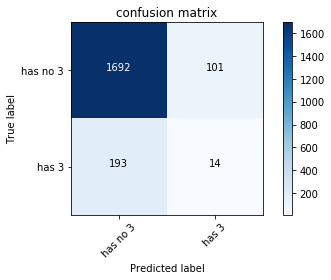

In [83]:
cm_plot_labels=['has no 3','has 3']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')